<a href="https://colab.research.google.com/github/BirenderPanwar/EVA4_Phase1/blob/master/session13/assignment_2/YoloV3/YoloV3Sample_DonaldDuck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2: Yolov3 Object Detection for self annotated class 

### Class choosen is "Donald Duck" the famous cartoon character

1. YoloV2 package is taken from link (https://github.com/theschoolofai/YoloV3.git)

In [0]:
#!git clone https://github.com/theschoolofai/YoloV3.git

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [0]:
cd /content/gdrive/My Drive/TSAI/EVA_Phase1/session13/s13_assignment2/YoloV3/

/content/gdrive/My Drive/TSAI/EVA_Phase1/session13/s13_assignment2/YoloV3


In [0]:
!ls

# look for custom data folder
print("\nfolder under ./data")
!ls ./data

 annotation_tool   __pycache__	    utils
 cfg		   results.png	    video_frames
 data		   runs		    vim.exe.stackdump
 detect.py	   test.py	    weights
 models.py	   ting		    YoloV3Sample_flying_disc.ipynb
 out_out	   train.py	    YoloV3Sample.ipynb
 output		  'ubdivisions=1'

folder under ./data
customdata  customdata_org


In [0]:
#!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

In [0]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 11:28:07.816787: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [02:31<00:00,  3.30it/s]
Caching images (0.3GB): 100% 500/500 [00:01<00:00, 276.70it/s]
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500

# Bounding box and class prediction for video frame downloded from youtube

1. short video having "donald duck" as object class is downloaded from youtube using y2mate tool
2. ffmpeg tool is used to get the frames from mp4 video. all video frames are stored under: video_frames/inp_frames
3. detect.py is applied on inp_frames and output frame with predicted bounding boxes are stored at video_frames/out_frames
4. ffmpeg tool is used to generate the output video(.mp4) from video_frames/out_frames

In [0]:
# switch to input video directory to extract frames
cd /content/gdrive/My Drive/TSAI/EVA_Phase1/session13/s13_assignment2/YoloV3/video_frames/

/content/gdrive/My Drive/TSAI/EVA_Phase1/session13/s13_assignment2/YoloV3/video_frames


In [0]:
!ls

inp_frames.zip


In [0]:
# video frame are in zip file, extract it for detection processing
!unzip -q "inp_frames.zip"

In [0]:
# switch back to root working directory
cd /content/gdrive/My Drive/TSAI/EVA_Phase1/session13/s13_assignment2/YoloV3/

/content/gdrive/My Drive/TSAI/EVA_Phase1/session13/s13_assignment2/YoloV3


In [0]:
#!python detect.py --conf-thres 0.1 --output my_out1
!python detect.py --conf-thres 0.1 --source video_frames/inp_frames --output video_frames/out_frames

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='video_frames/out_frames', save_txt=False, source='video_frames/inp_frames', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1275 video_frames/inp_frames/image-0001.jpg: 320x512 Done. (0.017s)
image 2/1275 video_frames/inp_frames/image-0002.jpg: 320x512 Done. (0.016s)
image 3/1275 video_frames/inp_frames/image-0003.jpg: 320x512 Done. (0.016s)
image 4/1275 video_frames/inp_frames/image-0004.jpg: 320x512 Done. (0.016s)
image 5/1275 video_frames/inp_frames/image-0005.jpg: 320x512 Done. (0.016s)
image 6/1275 video_frames/inp_frames/image-0006.jpg: 320x512 Done. (0.015s)
image 7/1275 video_frames/inp_frames/image

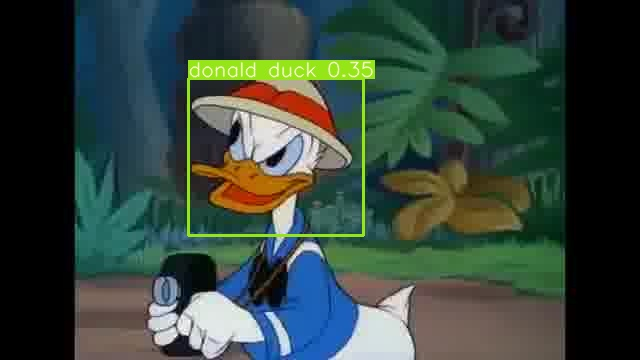

In [0]:
Image(filename='video_frames/out_frames/image-0290.jpg', width=600)

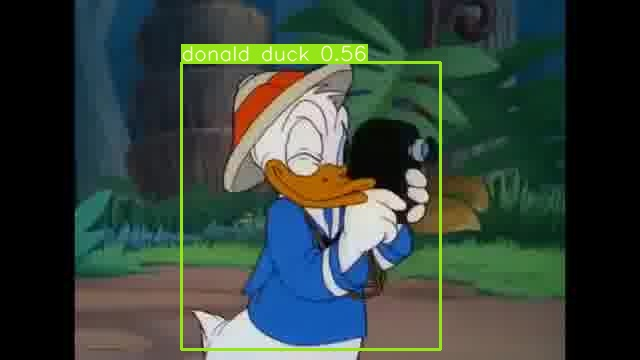

In [0]:
Image(filename='video_frames/out_frames/image-0353.jpg', width=600)

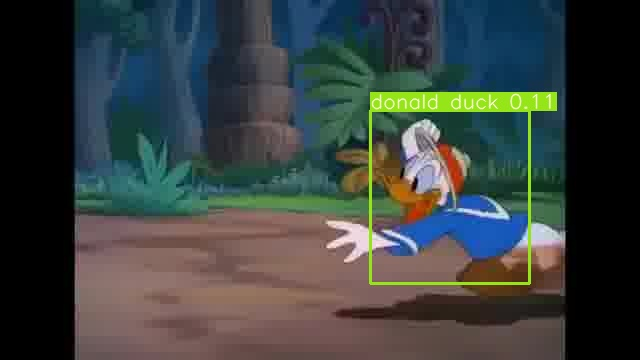

In [0]:
Image(filename='video_frames/out_frames/image-0762.jpg', width=600)

In [0]:
# zip the output frames with predicted class and bounding box
!zip -r ./video_frames/out_frames.zip ./video_frames/out_frames

  adding: video_frames/out_frames/ (stored 0%)
  adding: video_frames/out_frames/image-0001.jpg (deflated 8%)
  adding: video_frames/out_frames/image-0002.jpg (deflated 7%)
  adding: video_frames/out_frames/image-0003.jpg (deflated 5%)
  adding: video_frames/out_frames/image-0004.jpg (deflated 7%)
  adding: video_frames/out_frames/image-0005.jpg (deflated 9%)
  adding: video_frames/out_frames/image-0006.jpg (deflated 10%)
  adding: video_frames/out_frames/image-0007.jpg (deflated 11%)
  adding: video_frames/out_frames/image-0008.jpg (deflated 12%)
  adding: video_frames/out_frames/image-0009.jpg (deflated 15%)
  adding: video_frames/out_frames/image-0010.jpg (deflated 14%)
  adding: video_frames/out_frames/image-0011.jpg (deflated 16%)
  adding: video_frames/out_frames/image-0012.jpg (deflated 15%)
  adding: video_frames/out_frames/image-0013.jpg (deflated 15%)
  adding: video_frames/out_frames/image-0014.jpg (deflated 15%)
  adding: video_frames/out_frames/image-0015.jpg (deflated 15%